<a href="https://colab.research.google.com/github/luca-ferro/atividade2ia/blob/main/Atividade2IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIFAL - UNIVERSIDADE FEDERAL DE ALFENAS** <br>
Bacharelado de Ciência da Computação


---


Disciplina de Inteligência Artificial

Augusto Vieira de Oliveira | 2021.1.08.002<br>
Luca Ferro Oliveira | 2021.1.08.014

### Classificação

Para desenvolver esse projeto, vamos utilizar a base de dados disponível em https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis
<br>
<br>
Base de dados: **Microsoft_Stock.csv**
<br>
<br>
Atributos:


*   Date (Data)
*   Open (Preço de abertura)
*   High (Valor mais alto do dia)
*   Low (Valor mais baixo do dia)
*   Close (Preço de fechamento)

> Importando bibliotecas e a base de dados:

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
stock = pd.read_csv("https://raw.githubusercontent.com/luca-ferro/atividade2ia/main/Microsoft_Stock.csv")

> Exibir a tabela dos dados:

In [62]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


> Seleção dos atributos para aplicação em janela deslizante:

In [63]:
closingprice = stock['Close']
date = stock['Date']
df = pd.concat([date, closingprice], axis=1, keys=('Date and Time','| Closing Price'))
df.head(6)

,Date and Time,| Closing Price
0,4/1/2015 16:00:00,40.72
1,4/2/2015 16:00:00,40.29
2,4/6/2015 16:00:00,41.55
3,4/7/2015 16:00:00,41.53
4,4/8/2015 16:00:00,41.42
5,4/9/2015 16:00:00,41.48


> Definindo o tamanho da janela e criando a matriz de conhecimento:


In [64]:
window_size = 5

data = np.zeros((len(df) - window_size, window_size + 1))
for i in range(window_size, len(df)):
    data[i-window_size, :-1] = df.iloc[i-window_size:i, 1].values
    data[i-window_size, -1] = df.iloc[i, 1]

> Exibindo a matriz de conhecimento:

In [65]:
columns = [f'Day {i}' for i in range(1, window_size+1, 1)] + ['| Output']
knowledge_matrix = pd.DataFrame(data, columns=columns)
display(knowledge_matrix.head())

,Day 1,Day 2,Day 3,Day 4,Day 5,| Output
0,40.72,40.29,41.55,41.53,41.42,41.48
1,40.29,41.55,41.53,41.42,41.48,41.72
2,41.55,41.53,41.42,41.48,41.72,41.76
3,41.53,41.42,41.48,41.72,41.76,41.65
4,41.42,41.48,41.72,41.76,41.65,42.26


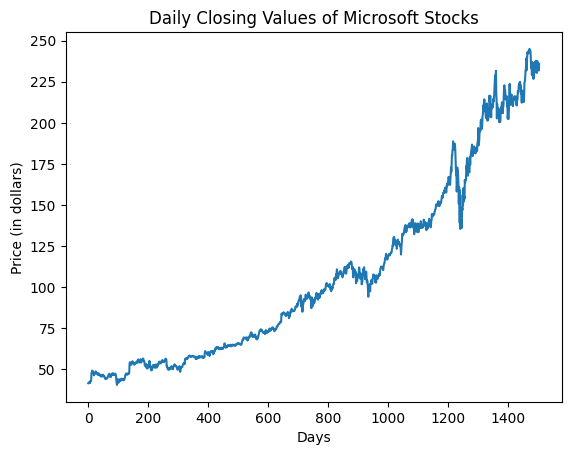

In [66]:
plt.plot(knowledge_matrix.index, knowledge_matrix['| Output'])
plt.xlabel('Days')
plt.ylabel('Price (in dollars)')
plt.title('Daily Closing Values of Microsoft Stocks')
plt.show()

### Construção do modelo de Inteligência Artificial para análise do código


> Divisão dos dados em conjuntos de treino e teste:

In [67]:
train_size = int(0.8 * len(data))
X_train, X_test = data[:train_size, :-1], data[train_size:, :-1]
y_train, y_test = data[:train_size, -1], data[train_size:, -1]

> Treino do modelo de regressão linear e previsões nos dados de teste:

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

> Cálculo do Erro Médio Absoluto (MAE) das previsões:

In [69]:
mae = sum(abs(predictions - y_test)) / len(y_test)
print("Erro médio absoluto (MAE):", mae)

Erro médio absoluto (MAE): 3.336400290434924


In [70]:
df.tail(10)

,Date and Time,| Closing Price
1501,3/18/2021 16:00:00,230.72
1502,3/19/2021 16:00:00,230.35
1503,3/22/2021 16:00:00,235.99
1504,3/23/2021 16:00:00,237.58
1505,3/24/2021 16:00:00,235.46
1506,3/25/2021 16:00:00,232.34
1507,3/26/2021 16:00:00,236.48
1508,3/29/2021 16:00:00,235.24
1509,3/30/2021 16:00:00,231.85
1510,3/31/2021 16:00:00,235.77


> Previsão baseada no treinamento da IA para os próximos 7 dias úteis:

In [71]:
last_window = df.tail(window_size)['| Closing Price'].values
next_days = []
for i in range(7):
    next_day = model.predict([np.concatenate(([df.iloc[-1, 1]], last_window[:-1]))])[0]
    print(f"Previsão para o dia {i+1}: {next_day}")
    next_days.append(next_day)
    # Atualiza a janela de dados com a nova previsão
    last_window = np.concatenate(([next_day], last_window[:-1]))

Previsão para o dia 1: 233.13902357829738
Previsão para o dia 2: 235.46136441538158
Previsão para o dia 3: 236.44101443764998
Previsão para o dia 4: 233.0790923078713
Previsão para o dia 5: 234.20575185358229
Previsão para o dia 6: 235.67666823892353
Previsão para o dia 7: 236.5496271142073


> Plotagem do gráfico dos últimos 21 dias úteis mais previsões de 7 dias úteis 

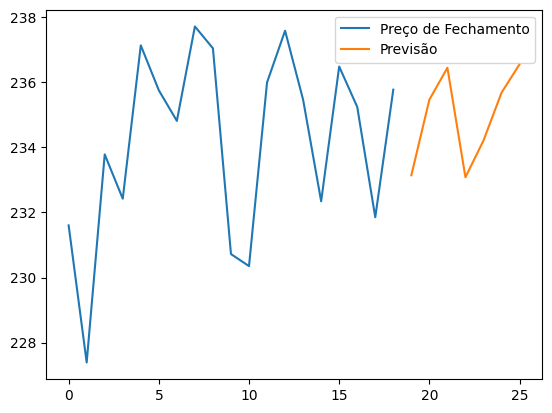

In [72]:
df['Previsao'] = np.nan
df.iloc[-7:, -1] = next_days

# Cria um novo DataFrame com as colunas 'Close' e 'Previsao'
concat_df = pd.concat([df[['| Closing Price']].tail(12 + len(next_days)), df[['Previsao']].tail(len(next_days))], ignore_index=True)

# Plota o gráfico
plt.plot(concat_df['| Closing Price'])
plt.plot(concat_df['Previsao'])
plt.legend(['Preço de Fechamento', 'Previsão'])
plt.show()